In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Notebook/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.shape

(2200, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
sorted(data['label'].unique())

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [ ]:
data['label'].describe()

count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object

In [ ]:
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])

In [ ]:
data['label']

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [ ]:
data['label_en'].unique()

KeyError: ignored

In [ ]:
x=data.iloc[:,:-1]
x

In [ ]:
y=data['label']
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:

x_train

,N,P,K,temperature,humidity,ph,rainfall
1567,27,120,200,21.452787,90.745319,6.110219,116.703658
2031,81,36,38,23.765547,87.983299,6.334838,150.316615
2073,90,59,35,24.251335,89.864541,7.098228,175.174211
1374,81,16,45,26.904357,86.254262,6.727468,59.759800
279,47,80,77,17.182484,16.428918,7.561108,72.850173
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [ ]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
446,32,70,20,20.893427,46.248565,6.208843,195.569787
1005,93,94,53,25.866324,84.423793,6.079179,114.535750
1919,117,56,15,25.992374,77.054355,7.368258,89.118821
708,27,64,21,32.842130,68.684015,7.543804,73.671662


In [ ]:
y_train

1567     0
2031     8
2073     8
1374    21
279      3
        ..
1033     1
1731    17
763      2
835     10
1653    16
Name: label, Length: 1760, dtype: int64

In [ ]:
y_test

1320    21
1367    21
1291     7
264      3
728      2
        ..
446     18
1005     1
1919     6
708      2
1546     0
Name: label, Length: 440, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([21, 21,  7,  3,  2,  8, 13,  9, 15,  1, 13,  5, 10, 14, 12,  0,  5,
       10,  5, 12,  4,  2,  9,  8,  6,  5, 10, 16, 13,  9, 19, 20, 11, 15,
        4,  6, 12, 12, 21,  2, 11,  2, 18, 21, 18, 14,  9,  9,  6, 14, 13,
        2,  0, 15, 18,  1, 17, 12, 10,  6, 16, 14, 21, 20, 15,  0,  7,  5,
        0, 16,  4, 19,  9, 11,  7, 13,  3, 11,  8, 12, 20,  2, 21, 21, 15,
        6, 11, 10, 13, 17,  2,  8, 14,  7, 14, 11,  5,  8, 10,  3, 16,  8,
       14,  1,  1, 20, 21,  5, 18, 15, 15, 12,  5,  7, 16, 19, 14, 10, 11,
        8, 19, 10, 16,  3,  3,  2, 19, 16,  3, 17, 13, 13, 15, 14, 11, 14,
        4, 19, 16,  2,  2,  7,  0,  5,  3,  0,  8, 12, 21, 17, 16,  4, 13,
        1, 19,  3, 21,  2,  0,  8, 10, 18,  8,  9,  9, 15, 20, 15,  1, 16,
       18,  0, 13,  4,  6, 14,  9, 19, 17, 16, 20, 17, 17, 18,  9,  1,  4,
        9, 20, 17, 11,  8, 13, 20, 11,  5, 18,  4,  3, 12,  4, 19, 11, 13,
       13, 16, 15, 11, 18,  1,  3,  2, 18, 16, 13, 14, 12, 17, 15, 19,  8,
       20,  2, 17,  2,  5

In [ ]:
from sklearn.metrics import r2_score,precision_score,accuracy_score,recall_score,mean_squared_error

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score

In [ ]:
R2_score=r2_score(y_test,y_pred)

In [ ]:
R2_score

0.9318913198598336

,Actual Value,Predicted Value,Difference
1320,21,21,0
1367,21,21,0
1291,7,7,0
264,3,3,0
728,2,2,0
...,...,...,...
446,18,18,0
1005,1,1,0
1919,6,6,0
708,2,2,0


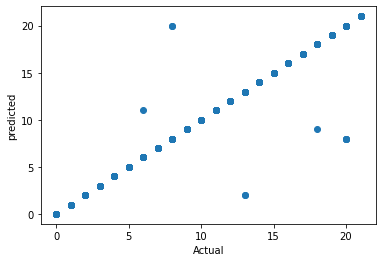

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
pred_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

In [ ]:
y_pred1=model.predict([[105,	14,	50,	26.214884,	87.68,	6.41,	59.65]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(y_pred1)

[21]


In [ ]:
['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [ ]:
data['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
if y_pred1==[0]:
  print('apple')
elif y_pred1==[1]:
  print('banana')
elif y_pred1==[2]:
  print('blackgram')
elif y_pred1==[3]:
  print('chickpea')
elif y_pred1==[4]:
  print('coconut')
elif y_pred1==[5]:
  print('coffee')
elif y_pred1==[6]:
  print('cotton')
elif y_pred1==[7]:
  print('grapes')
elif y_pred1==[8]:
  print('jute')
elif y_pred1==[9]:
  print('kidneybeans')
elif y_pred1==[10]:
  print('lentil')
elif y_pred1==[11]:
  print('maize')
elif y_pred1==[12]:
  print('mango')
elif y_pred1==[13]:
  print('mothbeans')
elif y_pred1==[14]:
  print('mungbean')
elif y_pred1==[15]:
  print('muskmelon')
elif y_pred1==[16]:
  print('orange')
elif y_pred1==[17]:
  print('papaya')
elif y_pred1==[18]:
  print('pigeonpeas')
elif y_pred1==[19]:
  print('pomegranate')
elif y_pred1==[20]:
  print('rice')
elif y_pred1==[21]:
  print('watermelon')

watermelon


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
(2200, 8)
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']
count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object
0       20
1       20
2       20


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


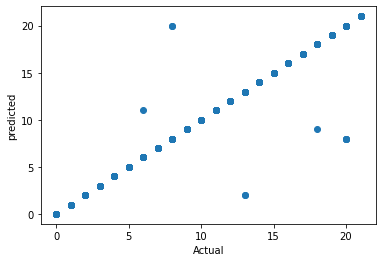

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/Notebook/Crop_recommendation.csv')
print(data.head())
print(data.shape)
from sklearn.preprocessing import LabelEncoder
print(data['label'].unique())
print(sorted(data['label'].unique()))
print(data['label'].describe())
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])
print(data['label'])
print(data.head())
x=data.iloc[:,:-1]
print(x)
y=data['label']
print(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import r2_score,precision_score,accuracy_score,recall_score,mean_squared_error
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score
R2_score=r2_score(y_test,y_pred)
print(R2_score)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
pred_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
print(pred_df)
y_pred1=model.predict([[105,	14,	50,	26.214884,	87.68,	6.41,	59.65]])
print(y_pred1)
if y_pred1==[0]:
  print('apple')
elif y_pred1==[1]:
  print('banana')
elif y_pred1==[2]:
  print('blackgram')
elif y_pred1==[3]:
  print('chickpea')
elif y_pred1==[4]:
  print('coconut')
elif y_pred1==[5]:
  print('coffee')
elif y_pred1==[6]:
  print('cotton')
elif y_pred1==[7]:
  print('grapes')
elif y_pred1==[8]:
  print('jute')
elif y_pred1==[9]:
  print('kidneybeans')
elif y_pred1==[10]:
  print('lentil')
elif y_pred1==[11]:
  print('maize')
elif y_pred1==[12]:
  print('mango')
elif y_pred1==[13]:
  print('mothbeans')
elif y_pred1==[14]:
  print('mungbean')
elif y_pred1==[15]:
  print('muskmelon')
elif y_pred1==[16]:
  print('orange')
elif y_pred1==[17]:
  print('papaya')
elif y_pred1==[18]:
  print('pigeonpeas')
elif y_pred1==[19]:
  print('pomegranate')
elif y_pred1==[20]:
  print('rice')
elif y_pred1==[21]:
  print('watermelon')
